In [2]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.9 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [5]:

# Define the fuzzy variables
temperature = ctrl.Antecedent(np.arange(95, 106, 0.1), 'temperature')
heart_rate = ctrl.Antecedent(np.arange(50, 161, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(80, 201, 1), 'blood_pressure')
diagnosis = ctrl.Consequent(np.arange(0, 101, 1), 'diagnosis')

# Define fuzzy membership functions
temperature['low'] = fuzz.trapmf(temperature.universe, [95, 95, 97, 98.6])
temperature['normal'] = fuzz.trimf(temperature.universe, [97, 98.6, 100])
temperature['high'] = fuzz.trapmf(temperature.universe, [98.6, 100, 105, 105])

heart_rate['bradycardia'] = fuzz.trapmf(heart_rate.universe, [50, 50, 60, 80])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [60, 80, 100])
heart_rate['tachycardia'] = fuzz.trapmf(heart_rate.universe, [80, 100, 160, 160])

blood_pressure['low'] = fuzz.trapmf(blood_pressure.universe, [80, 80, 90, 110])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [90, 120, 140])
blood_pressure['high'] = fuzz.trapmf(blood_pressure.universe, [120, 140, 200, 200])

diagnosis['stable'] = fuzz.trimf(diagnosis.universe, [0, 25, 50])
diagnosis['alert'] = fuzz.trimf(diagnosis.universe, [25, 50, 75])
diagnosis['critical'] = fuzz.trimf(diagnosis.universe, [50, 75, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['normal'] & heart_rate['normal'] & blood_pressure['normal'], diagnosis['stable'])
rule2 = ctrl.Rule(temperature['high'] | heart_rate['tachycardia'] | blood_pressure['high'], diagnosis['critical'])
rule3 = ctrl.Rule(temperature['low'] | heart_rate['bradycardia'] | blood_pressure['low'], diagnosis['alert'])

# Create control system and simulation
diagnosis_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
diagnosis_sim = ctrl.ControlSystemSimulation(diagnosis_ctrl)

# Input clinical parameters
diagnosis_sim.input['temperature'] = float(input("Enter temperature (°F): "))
diagnosis_sim.input['heart_rate'] = float(input("Enter heart rate (bpm): "))
diagnosis_sim.input['blood_pressure'] = float(input("Enter blood pressure (mmHg): "))

# Compute the diagnosis
diagnosis_sim.compute()

# Output the result
diagnosis_level = diagnosis_sim.output['diagnosis']
if diagnosis_level <= 25:
    result = "Stable condition. No immediate action needed."
elif 25 < diagnosis_level <= 50:
    result = "Alert condition. Monitor closely."
else:
    result = "Critical condition. Immediate medical attention required."

print(f"Diagnosis Level: {diagnosis_level:.2f}")
print(f"Decision: {result}")
#will help to find out deviation just like xplainable ai

Enter temperature (°F): 45
Enter heart rate (bpm): 56
Enter blood pressure (mmHg): 78
Diagnosis Level: 50.00
Decision: Alert condition. Monitor closely.


In [7]:
import matplotlib.pyplot as plt


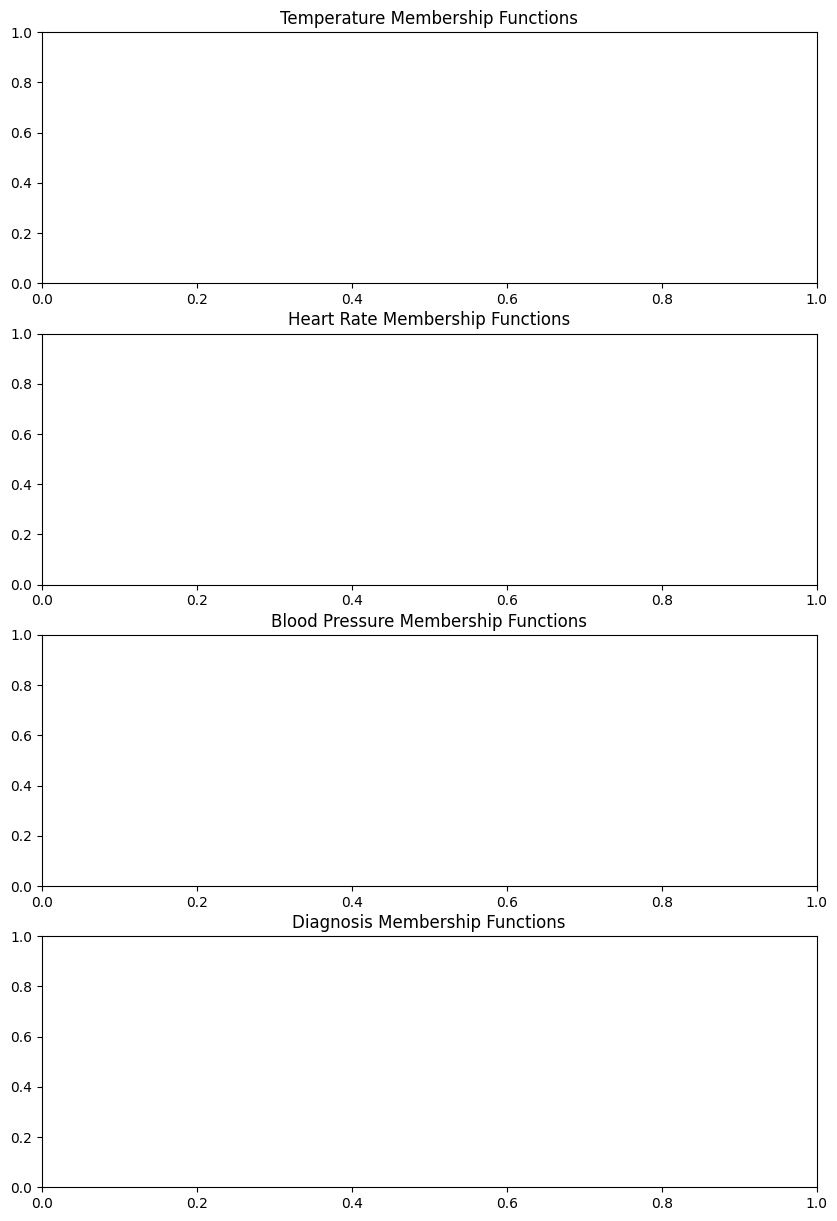

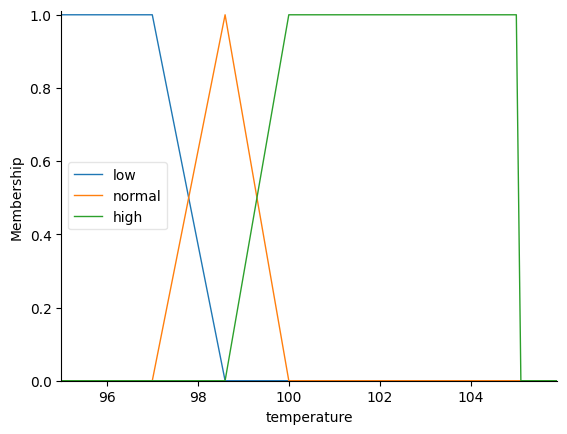

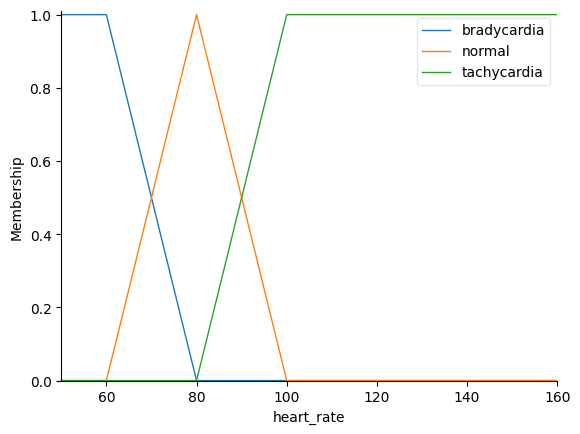

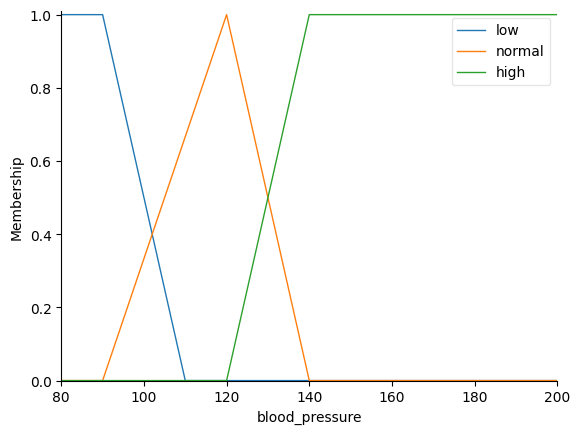

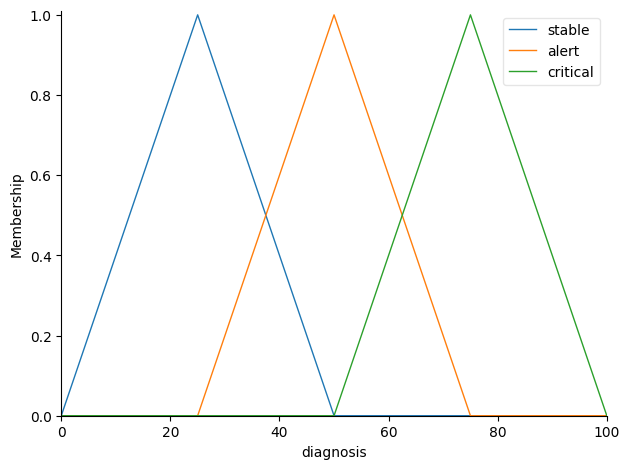

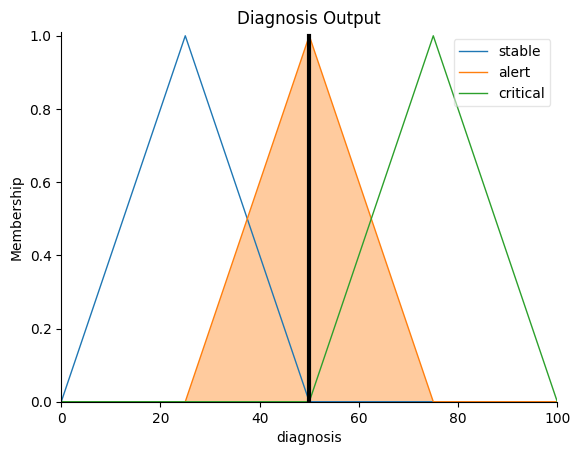

In [8]:
# Visualize membership functions
def plot_memberships():
    fig, axs = plt.subplots(4, 1, figsize=(10, 15))

    # Plot temperature
    temperature.view(ax=axs[0])
    axs[0].set_title("Temperature Membership Functions")

    # Plot heart rate
    heart_rate.view(ax=axs[1])
    axs[1].set_title("Heart Rate Membership Functions")

    # Plot blood pressure
    blood_pressure.view(ax=axs[2])
    axs[2].set_title("Blood Pressure Membership Functions")

    # Plot diagnosis
    diagnosis.view(ax=axs[3])
    axs[3].set_title("Diagnosis Membership Functions")

    plt.tight_layout()
    plt.show()

# Visualize diagnosis process
def plot_diagnosis():
    diagnosis.view(sim=diagnosis_sim)
    plt.title("Diagnosis Output")
    plt.show()

# Plot the visualizations
plot_memberships()
plot_diagnosis()
